# Gradient Descent from scratch

    This notebook describes the gradient descent technique, a technique that is used in finding the best model. 
    With 'best' we mean a model that minimizes the error of the model and therefore maximizes the likelihood of the data. 

In [12]:
from __future__ import division
from collections import Counter
from linear_algebra import distance, vector_subtract, scalar_multiply
import math, random
%matplotlib inline
import matplotlib.pyplot as plt

In [1]:
# we often need to maximize (or minimize) functions. For this we use the sum of squares of a vector (input) v
def sum_of_squares(v):
    """computes the sum of squared elements in v"""
    return sum(v_i ** 2 for v_i in v)

    The gradient (represented by the vector of partial derivatives) give the input direction in which the function most quickly increases.
    One approach to maximizing a function is to pick a random starting point, compute the gradient descent, take a small step in the direction of the gradient( the direction that causes the function to increase the most), and repeat with the new starting point. 

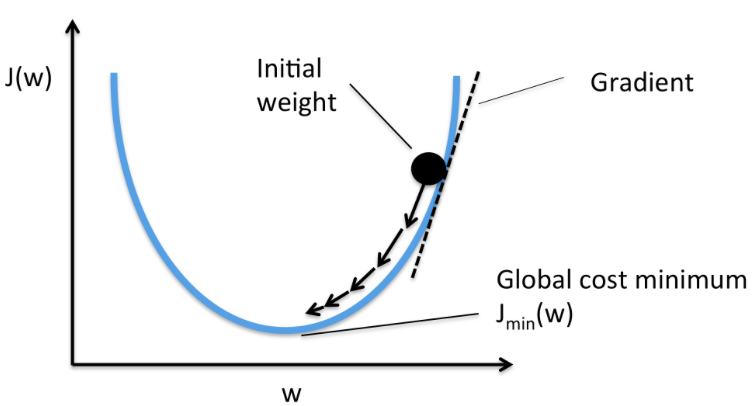

In [4]:
from IPython.display import Image
Image(filename='/Users/annalie/Dev/data-science-from-scratch/pictures/gradient-descent-1.png')

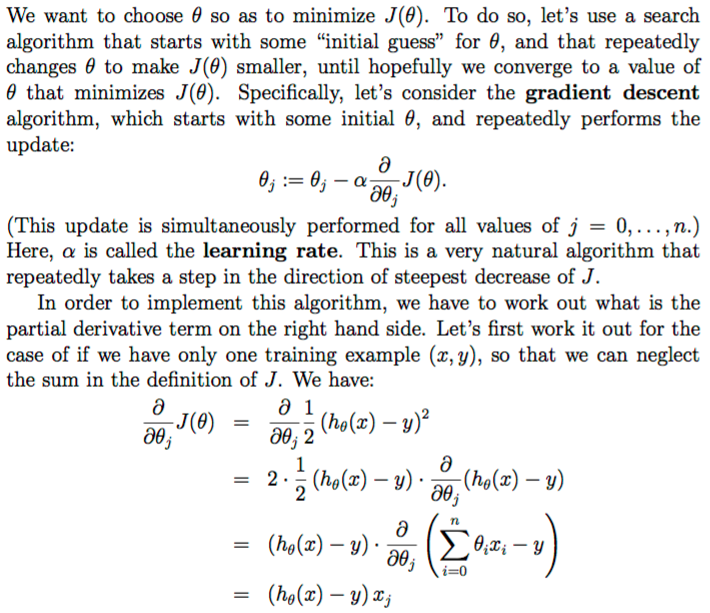

In [5]:
Image(filename='/Users/annalie/Dev/data-science-from-scratch/pictures/gradient-descent-2.png')

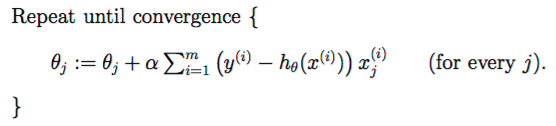

In [6]:
# repeat until the partial derivitave equals 0
Image(filename='/Users/annalie/Dev/data-science-from-scratch/pictures/gradient-descent-3.png')

    If f is a funciton of one variable, its derivative at a point x measures how f(x) changes when we make a very small change to x.
    It is defined as the limit of the difference quotients:

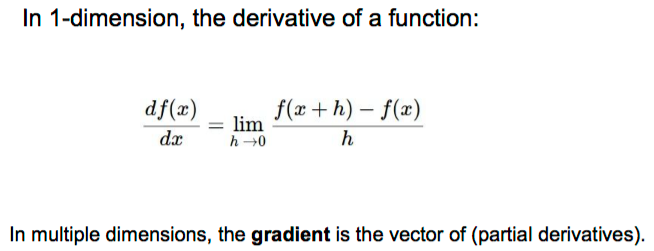

In [7]:
Image(filename='/Users/annalie/Dev/data-science-from-scratch/pictures/gradient-descent-4.png')

In [8]:
def difference_quotient(f, x, h):
    return (f(x + h) - f(x)) / h

# as h approaches zero

    The derivative is the slope through (x, f(x)),
    while the difference quotient is the slope of the line that runs through (x, f(x)) and (x + h, f(x + h))

/Users/annalie/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


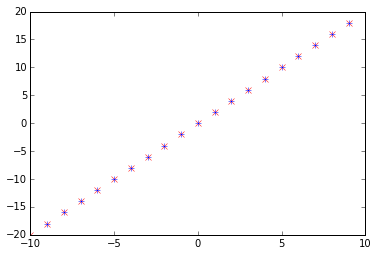

In [15]:
# estimate derivative
def square(x):
        return x * x

def derivative(x):
    return 2 * x
    
derivative_estimate = lambda x: difference_quotient(square, x, h=0.00001)

# plot to show they're basically the same
x = range(-10,10)
plt.plot(x, map(derivative, x), 'rx')           # red  x
plt.plot(x, map(derivative_estimate, x), 'b+')  # blue +
plt.legend(loc=9)
plt.show()

In [18]:
# calculate the i-th artial derivative by treating it as a funciton of just its i'th variable 
# holding the other variables fixed:
def partial_difference_quotient(f, v, i, h):
    """compute the ith partial difference quotient of f at v"""
    w = [v_j + (h if j == i else 0) # add h to just the ith element of v
         for j, v_j in enumerate(v)]
    return (f(w) - f(v)) / h
    

In [19]:
# and estimate the gradient:
def estimate_gradient(f, v, h = 0.00001):
    return [partial_difference_quotient(f, v, i, h)
           for i, _ in enumerate(v)]

# Using the Gradient

In [25]:
def step(v, direction, step_size):
    """move step_size in the direction from v"""
    return [v_i + step_size * direction_i
           for v_i, direction_i in zip(v, direction)]

def sum_of_squares_gradient(v):
    return [2 * v_i for v_i in v]

# pick a random starting point
v = [random.randint(-10, 10) for i in range(3)]

tolerance = 0.0000001

while True:
    gradient = sum_of_squares_gradient(v) # compute the gradient at v
    next_v = step(v, gradient, -0.01)     # take a negative gradient step
    if distance(next_v, v) < tolerance:   # stop if we are converging, to prevent overshooting
        break
    v = next_v                            # continue if we're not

# Choosing the right step size

In [26]:
# choose from a variety of step sizes:
step_sizes = [100, 10, 1, 0.1, 0.001, 0.0001, 0.00001]

def safe(f):
    """return a new function that's the same as f,
    except that it outputs infinity whenever f produces an error"""
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float(inf)
    return safe_f

# Putting it all together

    In the general case, we have some target_fn that we want to minimize, and we also have its gradient_fn.
    For example, the target_fn could represent the errors in a model as a function of its parameters, and we might want to find the parameters that make the errors as small as possible.

In [28]:
# use gradient descent to find theta that minimizes target function
# let's say the starting value for the parameters theta_0 is given

def minimize_batch(target_fn, gradient_fn, theta_0, tolerance = 0.000001):
    """use gradient descent to find theta that minimizes target function"""
    step_sizes = [100, 10, 1, 0.1, 0.001, 0.0001, 0.00001]
    theta = theta_0             # set theta to initial value
    target_fn = safe(target_fn) # safe version of target_fn
    value = target_fn(theta)    # value we are minimizing
    
    while True:
        gradient = gradient_fn(theta)
        next_thetas = [step(theta, gradient, -step_size)
                      for step_size in step_sizes]
    
    # choose the one that minimizes the error function
    next_theta = min(next_thetas, key = target_fn)
    next_value = target_fn(next_theta)
    
    # stop if we're converging
    if abs(value - next_value) < tolerance:
        return theta
    else:
        theta, value = next_theta, next_value
        
# we defined minimize_batch because, for each gradient step, it looks at the entire data set 
# (because target_fn returns the error on the whole data set)

    Sometimes we'll instead want to maximize a funciton, which we can do by minimizing its negative

In [29]:
def negate(f):
    """return a function that for any input x returns -f(x)"""
    return lambda *args, **kwargs: -f(*args, **kwargs)

def negate_all(f):
    """the same when f returns a list of numbers"""
    return lambda *args, **kwargs: [-y for y in f(*args, **kwargs)]

def maximize_batch(target_fn, gradient_fn, theta_0, tolerance = 0.000001):
    return minimize_batch(negate(target_fn),
                         netate_all(gradient_fn),
                         theta_0,
                         tolerance)

# Stochastic Gradien Descent

    The gradient descent as described above computes the gradient for the whole data set. 
    Which makes each step take a long time.
    
    Stochastic gradient descent computes the gradient (and takes a step) for only one point at a time. 
    It cycles over the data repeatedly until it reaches a stopping point.

In [30]:
# during each cycle, iterate through the data in a random order
def in_random_order(data):
    """generator that returns the elements of data in random order"""
    indexes = [i for i, _ in enumerate(data)] # create a list of indexes
    random.shuffle(indexes)                   # shuffle them
    for i in indexes:
        yield data[i]

In [31]:
# take a gradient step for each data point.
# however, this approach leaves the possbility that we might circle around near a minimum forever,
# so whenever we stop getting improvements,
# decrease the step size and eventually quit.

def minimize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):

    data = zip(x, y)
    theta = theta_0                             # initial guess
    alpha = alpha_0                             # initial step size
    min_theta, min_value = None, float("inf")   # the minimum so far
    iterations_with_no_improvement = 0
    
    # if we ever go 100 iterations with no improvement, stop
    while iterations_with_no_improvement < 100:
        value = sum( target_fn(x_i, y_i, theta) for x_i, y_i in data )

        if value < min_value:
            # if we've found a new minimum, remember it
            # and go back to the original step size
            min_theta, min_value = theta, value
            iterations_with_no_improvement = 0
            alpha = alpha_0
        else:
            # otherwise we're not improving, so try shrinking the step size
            iterations_with_no_improvement += 1
            alpha *= 0.9

        # and take a gradient step for each of the data points        
        for x_i, y_i in in_random_order(data):
            gradient_i = gradient_fn(x_i, y_i, theta)
            theta = vector_subtract(theta, scalar_multiply(alpha, gradient_i))
            
    return min_theta

In [32]:
# do the same that maximizes the gradient
def maximize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):
    return minimize_stochastic(negate(target_fn),
                               negate_all(gradient_fn),
                               x, y, theta_0, alpha_0)